# Install

In [6]:
import os
os.chdir('./GymGo-master')
! pip install -e .

'/Users/yuetongliu/Desktop/Reinforcement_Learning_on_Go/Code/14_02_24_Go/GymGo-master'

In [14]:
import gym
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# define value function
size = 9
value_function = dict()
for i in range(-size**2,size**2+1):
    value_function[i] = [0]


In [17]:
# 1000 episodes
alpha=0.05
lamb=0.9
for i in range(10000): 
    
        go_env = gym.make('gym_go:go-v0', size=size, reward_method = "heuristic")
    
        done = False
        reward = 0
        for i in range(-size**2,size**2+1):
            value_function[i].append(0)
            
        while not done:
            action = go_env.uniform_random_action()
            suc_state, suc_reward, done, info = go_env.step(action)

            value_function[reward].append(value_function[reward][-1] + alpha * (
                suc_reward + lamb * value_function[suc_reward][-1] - value_function[reward][-1])) 

            reward = suc_reward
            if go_env.game_ended():
                break
            

        # white    
            action = go_env.uniform_random_action()
            state_w, reward_w, done, info = go_env.step(action)
        
    
        
    

# Plot Value Function Density

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


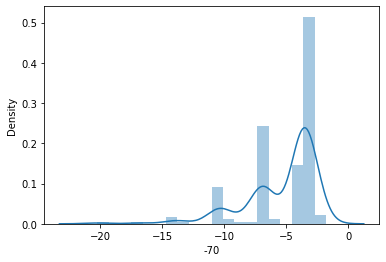

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


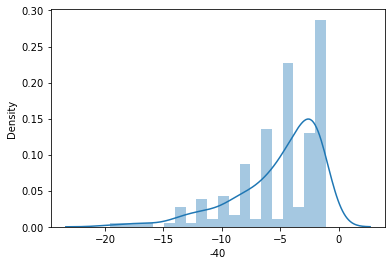

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


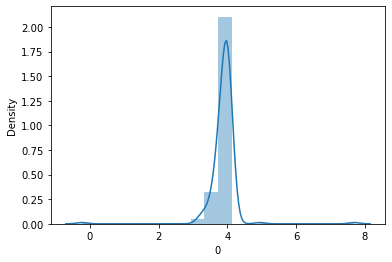

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


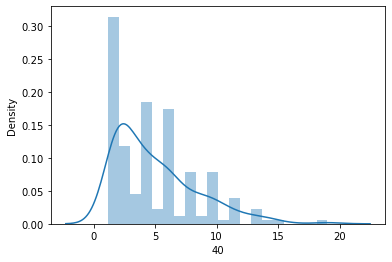

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


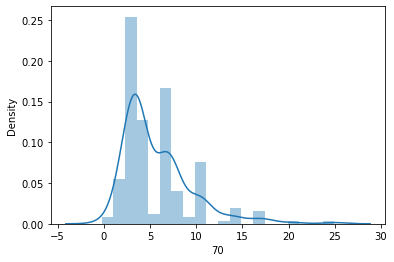

In [25]:
value_function_sample = dict()
for i in range(-size**2,size**2+1):
    value_function[i] = [j for j in value_function[i] if j != 0]
    #print(len(value_function[i]))
    
    #if len(value_function[i])>200:
    if i in [70, 40, 0, -40, -70]:
        value_function_sample[i] = random.sample(value_function[i],200)
        ax = sns.distplot(value_function_sample[i], bins=20)
        plt.xlabel(i)
        #plt.xlim(-5,5)
        #plt.ylim(0,4)
        plt.show()